In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


c:\Users\kk817\anaconda3\Lib\site-packages\keras\src\datasets\cifar.py:18: VisibleDeprecationWarning: dtype(): align should be passed as Python or NumPy boolean but got `align=0`. Did you mean to pass a tuple to create a subarray type? (Deprecated NumPy 2.4)
  d = cPickle.load(f, encoding="bytes")


In [17]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

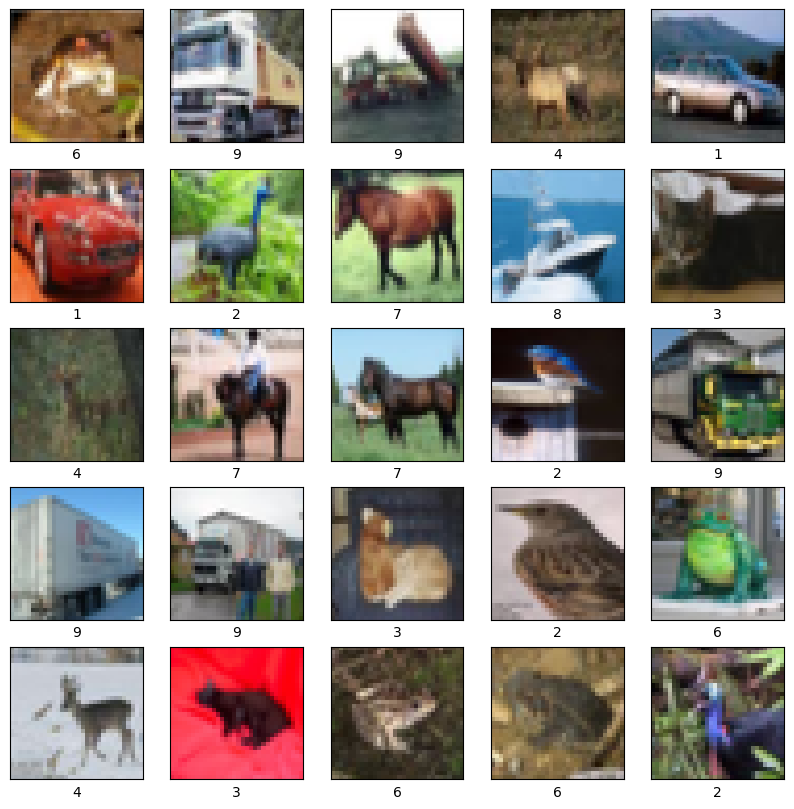

In [18]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i][0])

### Augmentation

In [19]:
#augmentation
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
    ]
)

### Model

In [20]:
model = tf.keras.Sequential(
    [
        data_augmentation,

        layers.Rescaling(1 / 255.0),

        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),

        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

- Compile
- fit
- evaluate
- save

In [24]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
#stop at maximum accuracy and restore the best weights
early_stopping = keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=3, restore_best_weights=True)
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[early_stopping])
model.evaluate(x_test, y_test)
model.save("cifar10_model.keras")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6792 - loss: 0.9139 - val_accuracy: 0.6879 - val_loss: 0.9051
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6842 - loss: 0.8977 - val_accuracy: 0.6995 - val_loss: 0.8788
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6889 - loss: 0.8836 - val_accuracy: 0.6902 - val_loss: 0.9147
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 44ms/step - accuracy: 0.6931 - loss: 0.8764 - val_accuracy: 0.6842 - val_loss: 0.9279
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.6981 - loss: 0.8606 - val_accuracy: 0.7054 - val_loss: 0.8614
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7015 - loss: 0.8543 - val_accuracy: 0.7115 - val_loss: 0.8480
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 44ms/step - accuracy: 0.6991 - loss: 0.8486 - val_accuracy: 0.7072 - val_loss: 0.8632
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 34ms/step - accuracy: 0.7048 -

### Ploting of train accu and val accu & train loss and val loss

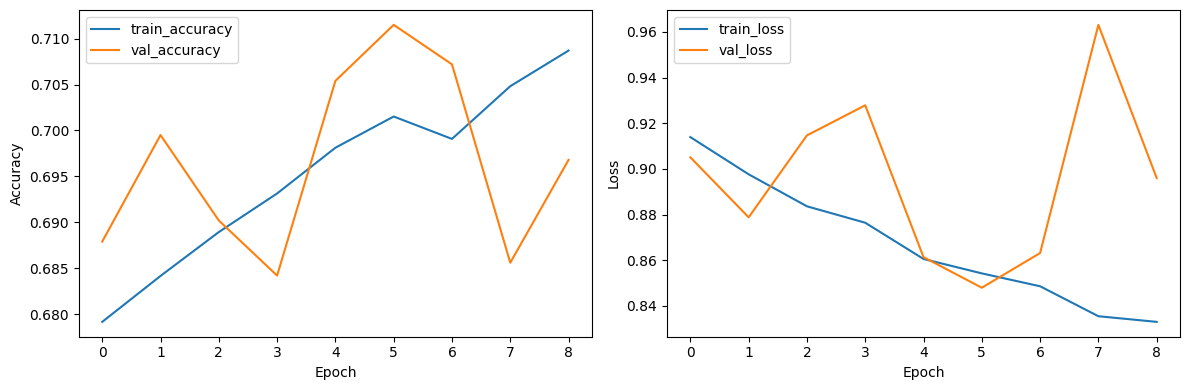

In [25]:
#plot training history
history = model.history.history

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="train_accuracy")
plt.plot(history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="train_loss")
plt.plot(history["val_loss"], label="val_loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()
